## Tensorflow low-level api practice

In [1]:
import tensorflow as tf

In [2]:
with tf.compat.v1.Session() as ses:

    a = tf.constant(1)
    b = tf.constant(2)
    c = a + b

    print(ses.run(c))

3


In [3]:
with tf.compat.v1.Session() as ses:
    
    a = tf.compat.v1.placeholder(dtype=tf.int32, name='a')
    b = tf.constant(2, name='b')
    c = a + b
    
    print(ses.run(c, feed_dict={a:3}))

5


In [4]:
with tf.compat.v1.Session() as ses:

    a = tf.constant([1, 2, 3])
    b = tf.constant([3, 2, 1])
    c = a + b

    print(ses.run(c))

[4 4 4]


In [5]:
with tf.compat.v1.Session() as ses:
    
    a = tf.compat.v1.placeholder(shape=(None, None, None), dtype=tf.int32, name='a')
    
    #b = [[[1, 2], [1, 2], [1, 2]], [[1, 2], [1, 2], [1, 2]], None]
    # The array must not be inhomogeneous
    
    b = [[[1, 2], [1, 2], [1, 2]], [[1, 2], [1, 2], [1, 2]], [[1, 2], [1, 2], [1, 2]]]
    
    print(ses.run(a, feed_dict={a: b}))
    

[[[1 2]
  [1 2]
  [1 2]]

 [[1 2]
  [1 2]
  [1 2]]

 [[1 2]
  [1 2]
  [1 2]]]


In [6]:
import datetime
import tensorflow as tf

#init = tf.compat.v1.global_variables_initializer()   
with tf.compat.v1.Session() as ses:
    
    LOG_DIR = './logs'
    
    a = tf.constant(1)
    b = tf.constant(2)
    c = a + b
    graph = tf.compat.v1.get_default_graph()
    with tf.compat.v1.summary.FileWriter(LOG_DIR) as writer:
        writer.add_graph(graph)

In [7]:
# Clear any logs from previous runs
#%reload_ext tensorboard
#%tensorboard --logdir=logs

In [8]:
import math

with tf.compat.v1.Session() as ses:
    
    x = tf.compat.v1.Variable(0., name='x')
    func = abs((x - 1)**3)
    
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)
    
    #train_step = optimizer.minimize(func)
    train_step = optimizer.minimize(func)
    
    ses.run(tf.compat.v1.global_variables_initializer())
    for i in range(1000):
        ses.run(train_step)
        
    print(ses.run(x))
    

0.9966971


Utilize gradient decscent


In [9]:
house_data = tf.keras.datasets.boston_housing.load_data()

In [10]:
type(house_data)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10*3
plt.rcParams['figure.figsize'] = [18, 12]

plt.hist(y_train, bins=20)
plt.xlabel('price')
plt.ylabel('number')
#plt.show()
#plt.plot(x_train[:, 5], y_train, 'o')
plt.close()

In [12]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_test_standard = (x_test - x_train_mean)/x_train_std
y_test_standard = (y_test - y_train_mean)/y_train_std
x_train_standard = (x_train-x_train_mean)/x_train_std
y_train_standard = (y_train-y_train_mean)/y_train_std

plt.close()

w是權重，計算x和w的matmul，讓loss接近最小來得出預測用的w

In [36]:
with tf.compat.v1.Session() as ses:
    x = tf.compat.v1.placeholder(tf.float32, (None, 13), name='x')
    y = tf.compat.v1.placeholder(tf.float32, (None, 1), name='y')
    w = tf.compat.v1.Variable(tf.compat.v1.random_normal((13, 1)))
    pred = tf.matmul(x, w)
    
    loss = tf.compat.v1.reduce_mean((y - pred)**2)
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)
    train_step = optimizer.minimize(loss)
    
    ses.run(tf.compat.v1.global_variables_initializer())
    for step in range(100):
        train_loss, _ = ses.run(
            [loss, train_step],
            feed_dict={
                x: x_train_standard,
                y: y_train_standard.reshape((-1, 1))
            }
        )
        print(step, train_loss)
        
    pred_ = ses.run(
        pred,
        feed_dict={
            x: x_test
        }
    )

0 4.137439
1 3.344097
2 2.7870858
3 2.3732595
4 2.054364
5 1.8012943
6 1.5957037
7 1.4256053
8 1.2828709
9 1.1617848
10 1.0581841
11 0.9689421
12 0.89164525
13 0.82438797
14 0.7656385
15 0.7141469
16 0.6688806
17 0.6289786
18 0.5937174
19 0.5624848
20 0.5347603
21 0.5100988
22 0.48811862
23 0.46849102
24 0.45093194
25 0.43519545
26 0.42106774
27 0.40836295
28 0.39691865
29 0.38659284
30 0.37726122
31 0.36881456
32 0.36115685
33 0.35420355
34 0.3478801
35 0.34212056
36 0.3368666
37 0.33206654
38 0.32767448
39 0.3236497
40 0.31995595
41 0.31656092
42 0.31343576
43 0.3105548
44 0.30789486
45 0.3054355
46 0.30315825
47 0.30104646
48 0.2990853
49 0.2972614
50 0.29556262
51 0.29397827
52 0.29249847
53 0.29111436
54 0.28981805
55 0.2886022
56 0.28746036
57 0.2863865
58 0.2853753
59 0.28442186
60 0.28352177
61 0.28267092
62 0.2818657
63 0.28110266
64 0.28037882
65 0.27969134
66 0.27903768
67 0.27841553
68 0.2778227
69 0.27725717
70 0.27671728
71 0.27620125
72 0.27570763
73 0.275235
74 0.274782

Text(0, 0.5, 'Price(Standarize)')

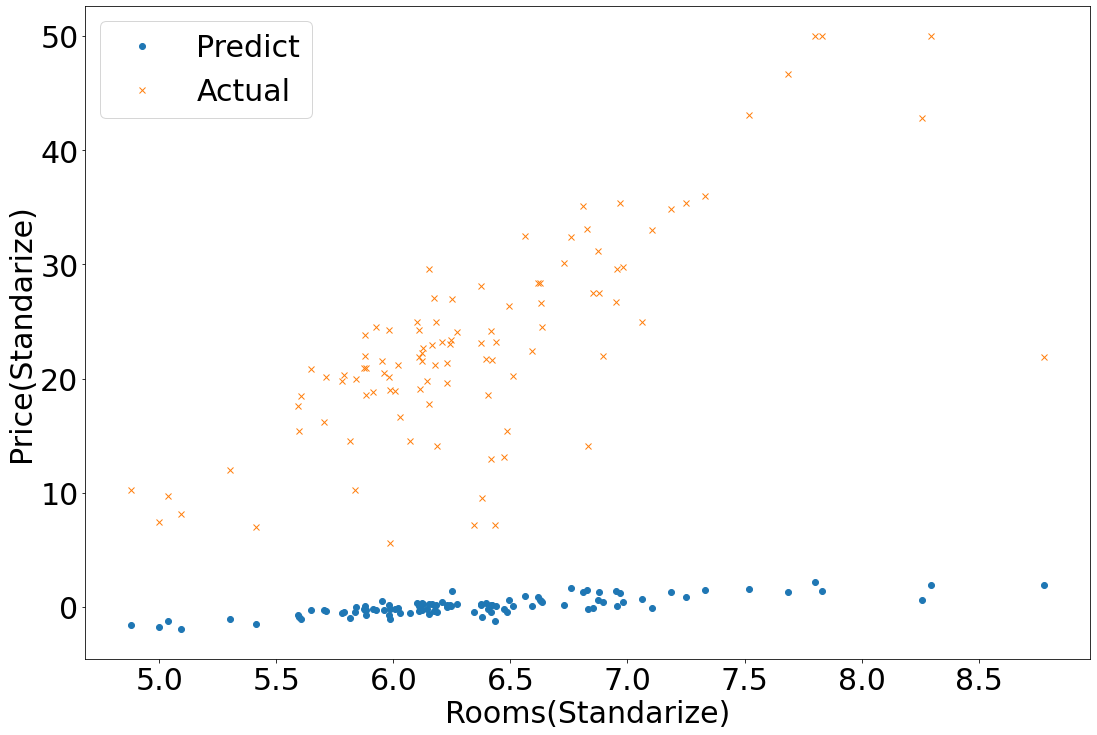

In [44]:
plt.plot(x_test[:, 5], pred_, 'o', label='Predict')
plt.plot(x_test[:, 5], y_test, 'x', label='Actual')
plt.legend(loc='upper left')
plt.xlabel('Rooms(Standarize)')
plt.ylabel('Price(Standarize)')

批次處理

In [38]:
import numpy as np

def get_batches(x, y, batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch

1.7675489329726397


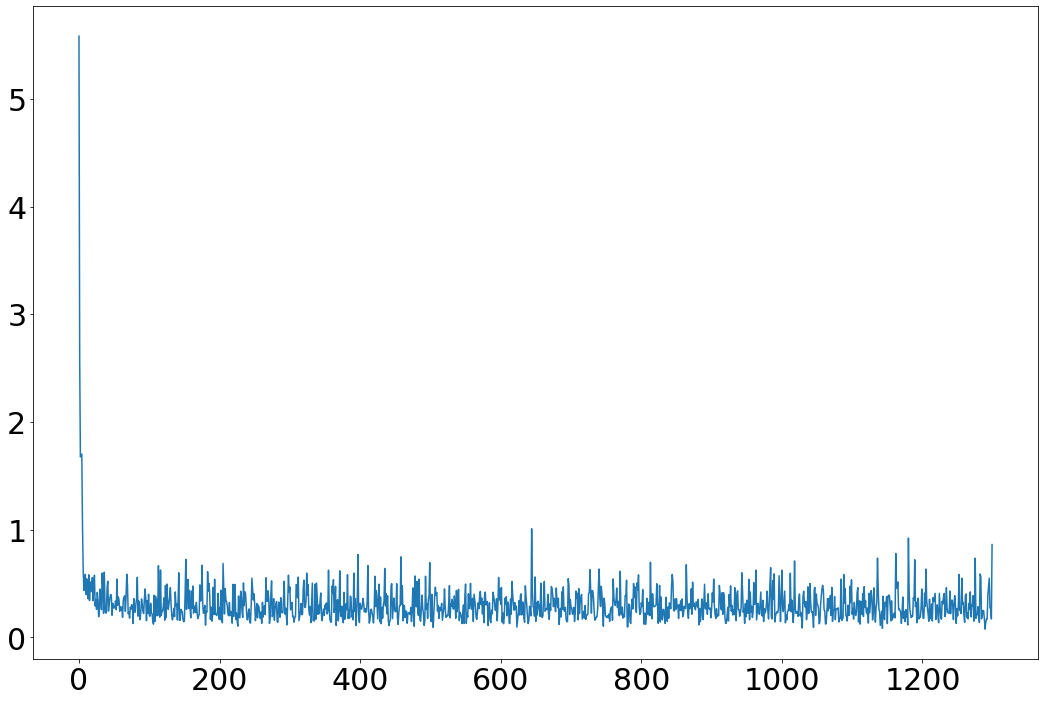

In [78]:
BATCH_SIZE = 32

step = 0

train_loss_total = []
with tf.compat.v1.Session() as ses:
    ses.run(tf.compat.v1.global_variables_initializer())
    
    for epoch in range(100):
        for x_batch, y_batch in get_batches(x_train_standard, y_train_standard, 32):
            train_loss, _ = ses.run(
                [loss, train_step],
                feed_dict={
                    x: x_batch,
                    y: y_batch.reshape((-1, 1))
                }
            )
            #print(step, train_loss)
            train_loss_total += [train_loss]
            step += 1
    
    #print(train_loss_total)
    #plt.plot(np.arange(step), train_loss_total, label='train_loss')

    pred_ = ses.run(
        pred,
        feed_dict={
            x: x_test_standard
        }
    )
    
    mse = ((pred_ - x_test_standard)**2).mean(axis=None)
    print(mse)
    

<function matplotlib.pyplot.show(close=None, block=None)>

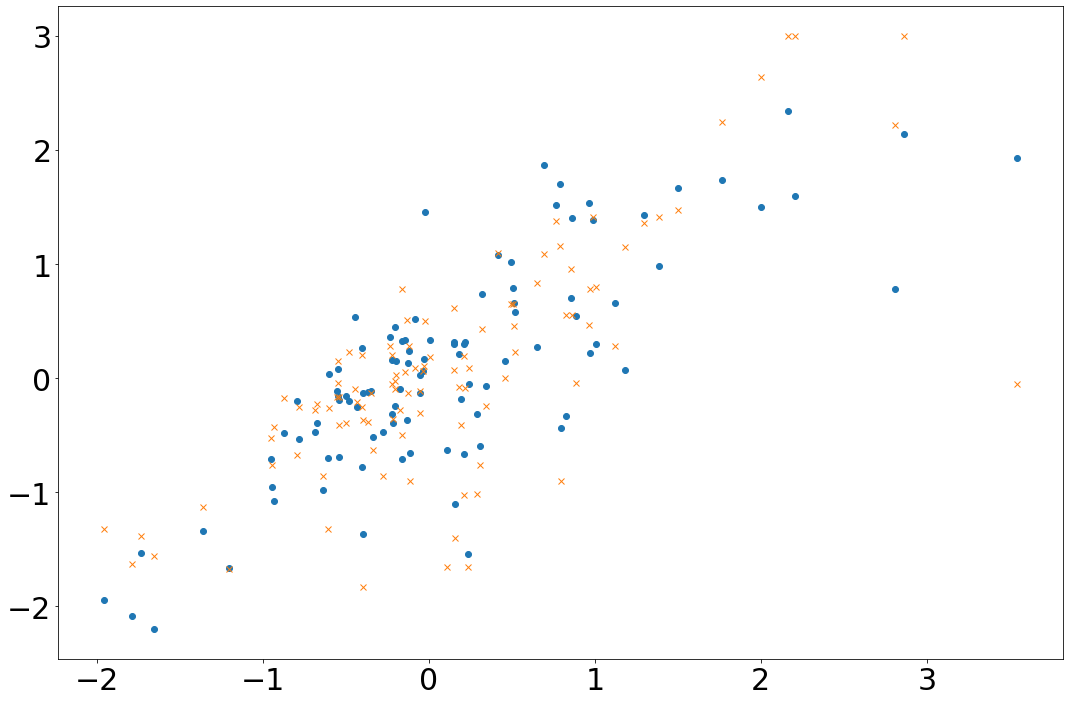

In [73]:
plt.plot(x_test_standard[:, 5], pred_, 'o', label='predict')
plt.plot(x_test_standard[:, 5], y_test_standard, 'x', label='actual')
plt.show